<a href="https://colab.research.google.com/github/DanyR2001/Progetto-FIA/blob/main/Documentazione/DocHistory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduzione

Di seguito si riporta il processo di studio e analisi dati del progetto: RegressorComparator. Il progetto prevede 2 modalità di utilizzo:
- **Auto**: Il programma proverà in maniera automatica ad effetuare le fasi di feature selection, scaling e di data cleaning. I risultati ottenuti non saranno molto precisi, ma per i meno esperti potrebbe essere la soluzione più semplice.
- **Manual**: Saremo noi a fornire al programma le feature sulle quali verranno effettuate tutte le fasi del modello CRISP-DM.

Successivamente, verranno prese in esame tutte le fasi di data understanding per la modalità **Manual**.


**Obiettivo**: Preso un dataset di dipendenti statali, provare a stimare i "Benefits" dello stipendio, ovvero i sussidi aggiuntivi allo stipendio.

**N.B**: Il seguente blocco note è necessario per illustrare e motiavare nello specifico, le scelte che sono state prese sui dati del progetto.
Il progetto reale, a cui mi sono ispirato, è disponibile su GitHub al seguente [link](https://github.com/DanyR2001/Progetto-FIA/tree/main).

#Normalizzazione del Dataset

Come prima cosa, dobbiamo poter rendere i dati fruibili per i regressori, ovvero in formato numerico. Dobbiamo capire quale metodologia ci convega adottare, trovando un trade-off tra memoria e efficacia.


---


Inzialmente ho prodotto un file che sostituisce autamaticamente i campi stringa di un dataset con un numero, producedo un nuovo dataset e un file .txt dove sono riporatare le modifiche.


---


Il quesito che dobbiamo porci è il seguente, la oneHotEncoder migliorerà l'accuratezza del nostro regressore? Ricordiamo che questa codifica è estremamente costosa computazionalemte parlando. Verifichiamo:



---


Iniziamo ad importare il dataset e a capire il formato dei suoi campi e la sua composizione.

In [ ]:
import pandas as pd
dataframe=pd.read_csv("./san-francisco-payroll_2011-2019.csv")
print (dataframe)
print (dataframe.info())

<ipython-input-5-e66e8990c073>:2: DtypeWarning: Columns (2,3,4,5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe=pd.read_csv("./san-francisco-payroll_2011-2019.csv")


           Employee Name                                       Job Title  \
0       Janet Lee Miller                         Court Staff Attorney II   
1               Gary Mar                  Electrical Transit System Mech   
2       Checil A Salvosa                       Licensed Vocational Nurse   
3       Kristian C Smock                    Stationary Eng, Sewage Plant   
4            Yun Y Chang                             Pharmacy Technician   
...                  ...                                             ...   
357402      HOWARD CHUCK                                       CUSTODIAN   
357403    BING KEUNG MAK                                       CUSTODIAN   
357404      QIN MING ZHU                                       CUSTODIAN   
357405       JOSE ALONZO                                       CUSTODIAN   
357406    NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   

         Base Pay Overtime Pay  Other Pay      Benefits  Total Pay  \
0             0.0

Come prima cosa notiamo che abbiamo il nome del dipendete nella colonna "Employee Name", informazione univoca della quale noi non abbiamo bisogno, quindi la eliminiamo.

In [ ]:
dataframe=dataframe.drop(columns=["Employee Name"])



---


Notiamo la presenza di Nan e di "Not provided", vista la grande quantità di tuple possiamo anche pensare di eliminare le righe che non ci danno informazioni. Notiamo che i Nan rappresentano una piccola perdita di informazioni visto che li troviamo solo nella feature "Status", a differenza dei "Not Provided".

In [ ]:
print("Number of istance Nan in tutto il dataset:" + str(dataframe.isna().sum().sum()))
print("Number of istance Nan nella colonna 'Status' :" + str(dataframe["Status"].isna().sum()))

Number of istance Nan in tutto il dataset:151501
Number of istance Nan nella colonna 'Status' :151501


Possiamo sostituirlo con "Non Presente".

In [ ]:
import numpy as np
dataframe=dataframe.replace(np.nan,"Not Present",regex=True)
print("Number of istance Nan in tutto il dataset:" + str(dataframe.isna().sum().sum()))
print("Number of istance Nan nella colonna 'Status' :" + str(dataframe["Status"].isna().sum()))

Number of istance Nan in tutto il dataset:0
Number of istance Nan nella colonna 'Status' :0


Ora dobbiamo capire l'entità dei "Not Provided".

In [ ]:
print ("Number of row: "+str(len(dataframe.index)))
print ("Number on 'Not Provided': "+str(dataframe[dataframe == 'Not Provided'].count()))

Number of row: 357407
Number on 'Not Provided': Job Title                  11
Base Pay                  606
Overtime Pay                1
Other Pay                   1
Benefits                36160
Total Pay                   0
Total Pay & Benefits        0
Year                        0
Status                      0
dtype: int64


Nonstante la quantità di "Not Provided" risulta essere sotto il 10% delle righe possiamo pensare di eliminarle.

In [ ]:
print ("Number of row before cleaning: "+str(len(dataframe.index)))
dataframe=dataframe.replace("Not Provided",np.nan,regex=True)
print("Number of istance Nan in tutto il dataset before cleaning:" + str(dataframe.isna().sum().sum()))
dataframe=dataframe.dropna()
print("Number of istance Nan in tutto il dataset after cleaning:" + str(dataframe.isna().sum().sum()))
print ("Number of row after cleaning: "+str(len(dataframe.index)))

Number of row before cleaning: 357407
Number of istance Nan in tutto il dataset before cleaning:36779
Number of istance Nan in tutto il dataset after cleaning:0
Number of row after cleaning: 320631




---


Aggiorniamo il tipo delle colonne modificate, così da migliorare l'occupazione di memoria.

In [ ]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320631 entries, 0 to 321247
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Job Title             320631 non-null  object 
 1   Base Pay              320631 non-null  object 
 2   Overtime Pay          320631 non-null  object 
 3   Other Pay             320631 non-null  object 
 4   Benefits              320631 non-null  object 
 5   Total Pay             320631 non-null  float64
 6   Total Pay & Benefits  320631 non-null  float64
 7   Year                  320631 non-null  int64  
 8   Status                320631 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 24.5+ MB
None


In [ ]:
dataframe['Job Title']=dataframe['Job Title'].astype(str)
dataframe['Base Pay']=dataframe['Base Pay'].astype(np.float64)
dataframe['Overtime Pay']=dataframe['Overtime Pay'].astype(np.float64)
dataframe['Other Pay']=dataframe['Other Pay'].astype(np.float64)
dataframe['Benefits']=dataframe['Benefits'].astype(np.float64)
dataframe['Status']=dataframe['Status'].astype(str)
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320631 entries, 0 to 321247
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Job Title             320631 non-null  object 
 1   Base Pay              320631 non-null  float64
 2   Overtime Pay          320631 non-null  float64
 3   Other Pay             320631 non-null  float64
 4   Benefits              320631 non-null  float64
 5   Total Pay             320631 non-null  float64
 6   Total Pay & Benefits  320631 non-null  float64
 7   Year                  320631 non-null  int64  
 8   Status                320631 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 24.5+ MB
None


Possiamo notare che sono rimasti i tipi object solo per i campi categorici.


---



Arriviamo ora alla principale domanda, conviene utilizzare la oneHotEncoder
su un classico personal computer?

Verifichiamo quanto occupa attualemte il dataframe

In [ ]:
print ("Usage memory in MB:")
print((dataframe.memory_usage(deep=True).sum())/(1024**2))
memory_old=(dataframe.memory_usage(deep=True).sum())/(1024**2)

Usage memory in MB:
61.76742744445801


Ora applichiamo la OneHotEncoder sulle 2 colonne non numeriche che abbiamo. Prima capiamo quanti e quali valori abbiamo:

In [ ]:
print("Numero di valori 'Job Title':")
print(dataframe['Job Title'].nunique())
print("Valori:")
print(dataframe['Job Title'].unique())

print("Numero di valori 'Status':")
print(dataframe['Status'].nunique())
print("Valori:")
print(dataframe['Status'].unique())


Numero di valori 'Job Title':
1256
Valori:
['Court Staff Attorney II' 'Electrical Transit System Mech'
 'Licensed Vocational Nurse' ... 'IS Technical-Journey'
 'Legislative Calendar Clerk' 'Police Services Aide']
Numero di valori 'Status':
3
Valori:
['PT' 'FT' 'Not Present']


Applichiamo la codifica

In [ ]:
df_enc_oneHot = pd.get_dummies(dataframe, columns=['Job Title', 'Status'])
print(df_enc_oneHot)
print(df_enc_oneHot.info())

         Base Pay  Overtime Pay  Other Pay  Benefits  Total Pay  \
0            0.00          0.00       0.00      0.00       0.00   
1        97354.53       6996.50    2380.00  38855.90  106731.03   
2        86118.00      17212.96    7272.08  34942.38  110603.04   
3       106816.03          0.00       0.00  38729.65  106816.03   
4        94039.13      14947.99    1241.69  35330.26  110228.81   
...           ...           ...        ...       ...        ...   
321243   51250.04          0.00     624.00  27041.97   51874.04   
321244   50154.51        112.37     400.00  28254.79   50666.88   
321245   51250.00          0.00     624.00  26995.16   51874.00   
321246   51485.11          0.00     810.00  26636.58   52295.11   
321247   61346.43          0.00       0.00  17590.09   61346.43   

        Total Pay & Benefits  Year  Job Title_ACPO,JuvP, Juv Prob (SFERS)  \
0                       0.00  2019                                      0   
1                  145586.93  2019       

Vediamo l'occupazione di memoria:

In [ ]:
print ("Usage memory in MB:")
print((df_enc_oneHot.memory_usage(deep=True).sum())/(1024**2))
memory_new=(df_enc_oneHot.memory_usage(deep=True).sum())/(1024**2)

Usage memory in MB:
404.54369831085205


Vediamo la differenza in temini percentuali:

In [ ]:
percentuale_incremento = ((memory_new - memory_old) / memory_old) * 100
print(str(percentuale_incremento)+"%")

554.9466523834467%


Creaiamo anche un dataset con codifica lable->numero.

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df_enc_simp=dataframe
df_enc_simp['Job Title']= label_encoder.fit_transform(df_enc_simp['Job Title'])
df_enc_simp['Job Title']=df_enc_simp['Job Title'].astype(np.int64)
df_enc_simp['Status']= label_encoder.fit_transform(df_enc_simp['Status'])


Verifichiamo l'occupazione di memoria di questa metodologia.

In [ ]:
print ("Usage memory in MB:")
print((df_enc_simp.memory_usage(deep=True).sum())/(1024**2))
memory_new=(df_enc_simp.memory_usage(deep=True).sum())/(1024**2)

Usage memory in MB:
24.462203979492188


Vediamo la differenza in termini percuentuali rispetto il dataframe iniziale

In [ ]:
percentuale_incremento = ((memory_new - memory_old) / memory_old) * 100
print(str(percentuale_incremento)+"%")

-60.39627196471977%


Otteniamo una riduzione della memoria utilizzata.


---



Prima di continuare verifichiamo la presenza o meno di outlier.

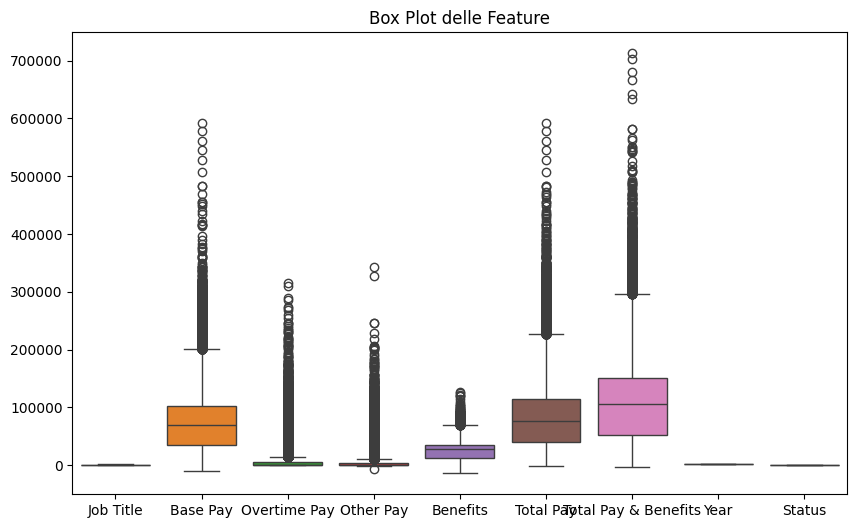

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_enc_simp)
plt.title("Box Plot delle Feature")
plt.show()
plt.close('all')

Vista la presenza di outlier, cerchiamo di mitigare questo problema, eliminado tutte le tuple al di fuori del primo e ultimo quartile.

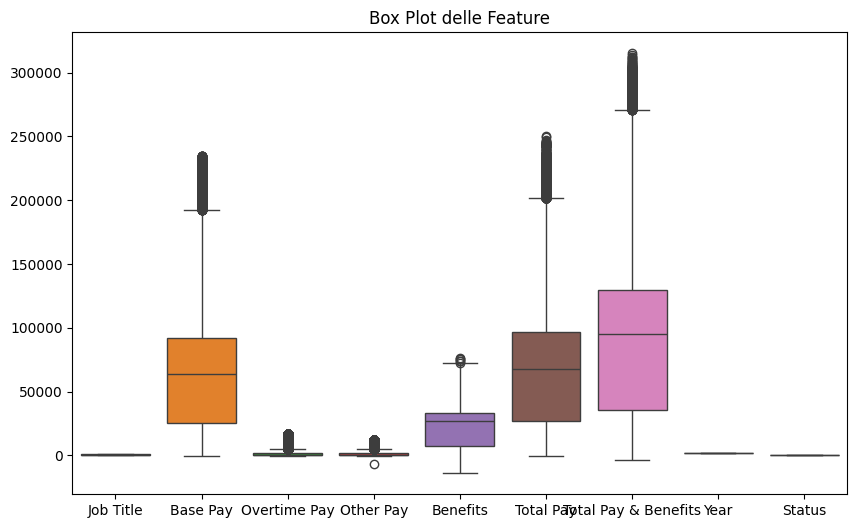

In [ ]:
rangeOutlier=2.0

Q1 = df_enc_simp.quantile(0.25)
Q3 = df_enc_simp.quantile(0.75)
IQR = Q3 - Q1

# Applicare il filtro separatamente per ciascuna colonna
mask = df_enc_simp.apply(lambda x: (x >= Q1[x.name] - rangeOutlier * IQR[x.name]) & (x <= Q3[x.name] + rangeOutlier * IQR[x.name]))

# Applicare la maschera al DataFrame usando il metodo loc
df_enc_simp = df_enc_simp.loc[mask.all(axis=1)]

# Proviamo a vedere le differenze
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_enc_simp)
plt.title("Box Plot delle Feature")
plt.show()
plt.close('all')

Dopo la pulizia il dataset è sicuramente più coeso.

#Analisi del dataset

Come prima cosa cerchiamo di capire come i dati siano tra loro correlati, in quanto se abbiamo una dipendeza lineare tra le feature, abbiamo maggiori possibilità di successo per i regressori di tipo lienare. Per fare ciò utilizzeremo la matrice di correlazione.

Ovviamente prima andremo ad eliminare le feature delle quali non necessitiamo, ovvere "Total Pay" e "Total Pay & Benefits". Ciò in quanto questi sono la somma di altre variabili e costituirebbero dei data leaky predictor.

In [ ]:
df_enc_simp=df_enc_simp.drop(columns=["Total Pay","Total Pay & Benefits"])
df_enc_oneHot=df_enc_oneHot.drop(columns=["Total Pay","Total Pay & Benefits"])

Ora possiamo procedere con la verifica

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266156 entries, 0 to 321247
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Job Title     266156 non-null  int64  
 1   Base Pay      266156 non-null  float64
 2   Overtime Pay  266156 non-null  float64
 3   Other Pay     266156 non-null  float64
 4   Benefits      266156 non-null  float64
 5   Year          266156 non-null  int64  
 6   Status        266156 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 16.2 MB
None


<Axes: >

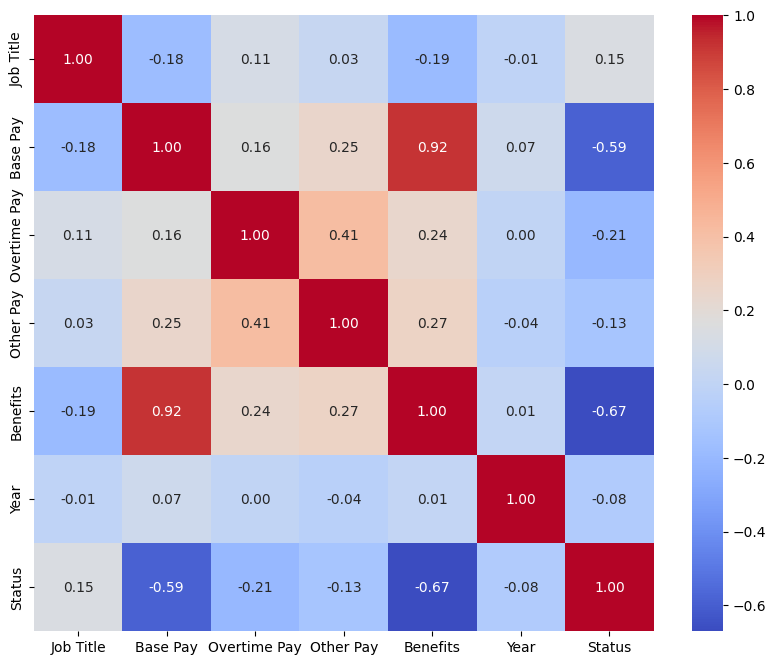

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df_enc_simp.info())
correlazione = df_enc_simp.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlazione, annot=True, cmap='coolwarm', fmt=".2f")

Per questioni computazionali, non è stata eseguita la tabella di correlazione per la oneHotEncoder, la quale dopo oltre 30 min non era stata completata.

Come possiamo notare le variabili con correlazione positiva con la nostra variabile target -ovvero "Benefits"- sono:
- BasePay
- OverTime Pay
- Other Pay

Visto e considerato questo, andremo a fare una pulizia di queste feature eliminando tutte quelle che sono uguali a zero.

In [ ]:
print ("Number of row before cleaning: "+str(len(df_enc_simp.index)))
df_enc_simp.drop(df_enc_simp[df_enc_simp['Base Pay'] == 0].index, inplace=True)
df_enc_simp.drop(df_enc_simp[df_enc_simp['Benefits'] == 0].index, inplace=True)
print ("Number of row after cleaning: "+str(len(df_enc_simp.index)))
df_enc_oneHot.drop(df_enc_oneHot[df_enc_oneHot['Base Pay'] == 0].index, inplace=True)
df_enc_oneHot.drop(df_enc_oneHot[df_enc_oneHot['Benefits'] == 0].index, inplace=True)

Number of row before cleaning: 266156
Number of row after cleaning: 259341


Ricordiamo l'obbiettivo di questo blocco note non è sviluppare il progetto ma capire se implementare o meno alcune funzionalità e giustificare le scelte prese nel progetto, le quali altrimenti potrebbero risultare aleatorie.
Per verificare o meno l'efficacia delle oneHotEncoder la utlizzeremo con un singolo Regressore.

In [ ]:
from sklearn import linear_model

Agente=linear_model.LinearRegression(n_jobs=-1)


Dividiamo il dataset in test e train:

In [ ]:
import random
from sklearn.model_selection import train_test_split


var_dip = df_enc_simp['Benefits']
var_ind = df_enc_simp.drop(columns=['Benefits'])

indi_training_set,indi_testing_set,dip_training_set,dip_test_set = train_test_split(var_ind, var_dip,test_size=0.33,random_state=random.randint(0, 256), shuffle=True)


Addestriamo e testiamo:

In [ ]:
from sklearn.model_selection import cross_validate, RepeatedKFold
import statistics


rfk = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random.randint(0, 256))
tests = list(["neg_mean_absolute_error", "neg_mean_squared_error","neg_root_mean_squared_error", "r2"])
cv_score = cross_validate(Agente, indi_training_set, dip_training_set, cv=rfk, n_jobs=1, verbose=5, scoring=tests)
fit_time_mean = statistics.mean(cv_score['fit_time'])
score_time_mean = statistics.mean(cv_score['score_time'])
mean_absolute = statistics.mean(cv_score['test_neg_mean_absolute_error'])
mean_squared = statistics.mean(cv_score['test_neg_mean_squared_error'])
root_mean_absolute = statistics.mean(cv_score['test_neg_root_mean_squared_error'])
r2 = statistics.mean(cv_score['test_r2'])

print("Fit time:"+str(fit_time_mean)+"Score time:"+str(score_time_mean)+" MAE: "+str(mean_absolute)+" MSE: "+str(mean_squared)+" RMSE: "+str(root_mean_absolute)+" r2: "+str(r2))

[CV] END  neg_mean_absolute_error: (test=-3813.857) neg_mean_squared_error: (test=-27328199.951) neg_root_mean_squared_error: (test=-5227.638) r2: (test=0.876) total time=   0.1s
[CV] END  neg_mean_absolute_error: (test=-3787.325) neg_mean_squared_error: (test=-26945256.609) neg_root_mean_squared_error: (test=-5190.882) r2: (test=0.878) total time=   0.1s
[CV] END  neg_mean_absolute_error: (test=-3804.178) neg_mean_squared_error: (test=-27299883.478) neg_root_mean_squared_error: (test=-5224.929) r2: (test=0.877) total time=   0.1s
[CV] END  neg_mean_absolute_error: (test=-3797.376) neg_mean_squared_error: (test=-26978869.135) neg_root_mean_squared_error: (test=-5194.119) r2: (test=0.878) total time=   0.1s
Fit time:0.061704158782958984Score time:0.011817395687103271 MAE: -3800.68421769665 MSE: -27138052.29315161 RMSE: -5209.391974168882 r2: 0.8772065053285445


Proviamo con il dataset codificato con la OneHot encoding:

In [ ]:
var_dip = df_enc_oneHot['Benefits']
var_ind = df_enc_oneHot.drop(columns=['Benefits'])

indi_training_set,indi_testing_set,dip_training_set,dip_test_set = train_test_split(var_ind, var_dip,test_size=0.33,random_state=random.randint(0, 256), shuffle=True)

rfk = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random.randint(0, 256))
tests = list(["neg_mean_absolute_error", "neg_mean_squared_error","neg_root_mean_squared_error", "r2"])
cv_score = cross_validate(Agente, indi_training_set, dip_training_set, cv=rfk, n_jobs=1, verbose=5, scoring=tests)
fit_time_mean_k = statistics.mean(cv_score['fit_time'])
score_time_mean_k = statistics.mean(cv_score['score_time'])
mean_absolute_k = statistics.mean(cv_score['test_neg_mean_absolute_error'])
mean_squared_k = statistics.mean(cv_score['test_neg_mean_squared_error'])
root_mean_absolute_k = statistics.mean(cv_score['test_neg_root_mean_squared_error'])
r2_k = statistics.mean(cv_score['test_r2'])

print("Fit time:"+str(fit_time_mean_k)+" Score time:"+str(score_time_mean_k)+" MAE: "+str(mean_absolute_k)+" MSE: "+str(mean_squared_k)+" RMSE: "+str(root_mean_absolute_k)+" r2: "+str(r2_k))


[CV] END  neg_mean_absolute_error: (test=-349593.712) neg_mean_squared_error: (test=-712511071058823.750) neg_root_mean_squared_error: (test=-26692903.009) r2: (test=-3120097.622) total time=  31.0s
[CV] END  neg_mean_absolute_error: (test=-2933.342) neg_mean_squared_error: (test=-19375920.665) neg_root_mean_squared_error: (test=-4401.809) r2: (test=0.916) total time=  29.3s
[CV] END  neg_mean_absolute_error: (test=-2916.512) neg_mean_squared_error: (test=-19225512.118) neg_root_mean_squared_error: (test=-4384.691) r2: (test=0.916) total time=  31.5s
[CV] END  neg_mean_absolute_error: (test=-308791.902) neg_mean_squared_error: (test=-224762805021450.594) neg_root_mean_squared_error: (test=-14992091.416) r2: (test=-977762.780) total time=  30.6s
Fit time:30.047814309597015 Score time:0.5545313954353333 MAE: -166058.86696140197 MSE: -234318478670426.78 RMSE: -10423445.231127582 r2: -1024464.64269985


Come possiamo notare r2 è peggiore con la oneHotEncoder, anche il tempo di fit e score sono notevolmente più alti. Di coseguenza non è stata implementata nel progetto. Cerchiamo di capire in termini percentuali:

In [ ]:
percentuale_fit_time_mean = ((fit_time_mean_k - fit_time_mean) / fit_time_mean_k) * 100
percentuale_score_time_mean = ((score_time_mean_k - score_time_mean) / score_time_mean_k) * 100
percentuale_mean_absolute = ((mean_absolute_k - mean_absolute) / mean_absolute_k) * 100
percentuale_mean_squared = ((mean_squared_k - mean_squared) / mean_squared_k) * 100
percentuale_root_mean_absolute = ((root_mean_absolute_k - root_mean_absolute) / root_mean_absolute_k) * 100
percentuale_r2 = ((r2_k - r2) / r2_k) * 100
print("Quanto è peggiore il dataset con la oneHot? fitTime: "+str(percentuale_fit_time_mean)+"% scoreTime: "+str(percentuale_score_time_mean)+"% MAE: "+str(percentuale_mean_absolute)+"% MSE: "+str(percentuale_mean_squared)+"% RMSE: "+str(percentuale_root_mean_absolute)+"% r2: "+str(percentuale_r2)+"%")

Quanto è peggiore il dataset con la oneHot? fitTime: 99.79464676482891% scoreTime: 97.86894019267817% MAE: 97.71124283379575% MSE: 99.99998841830468% RMSE: 99.95002235960703% r2: 100.00008562584483%


#Il progetto

Il resto del progetto è reperibile su GitHub. L'obiettivo è fornire uno stumento fruibile in diverse modalità modalità:

*   "Automatica" provvederà a compiere tutte le fasi di Feature Selection, Feature scaling e Data cleaning. Permettendo a chiunque di sperimentare e lavorare con i regressori.
*   "Manuale" saremo noi a cosigliare al programma su quale feature intervenire e che operazioni fare su queste'ultime.

Come facciamo a restituire un quadro completo rispetto al tipo di regressore che è più adatto ai nostri dati?
Comparando il risultati di:


*   Diverse normalizzazioni sui dati.
*   Diversi tipi di regressori, ovvero le 17 tipologie disponibili nella libreria scikit-learn.
* Offrendo una pulizia automatica degli outlier.
* E molto altro.

Tutto facilmente consultabile attraverso una GUI, portando a compimento l'obiettivo di aumentare la fruibilità di questi algoritmi di machine learning.